# Estudi Mean Shift

### Lectura fitxer estudi

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df_students = pd.read_csv("C:/Users/jesus/github-classroom/DCC-UAB/ACproject-07/datasets/Data Carrard.csv")
df_students = df_students.drop('id', axis = 1)

In [4]:
df_categorical = df_students[['sex', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']]
df_numerical = df_students[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]

In [5]:
def sampleig_dataset(dataset, frac):
    dataset = dataset.sample(frac=frac).reset_index(drop=True)
    return dataset

In [13]:
frac_train = 0.7
frac_test = 0.3

X_train = sampleig_dataset(df_numerical, frac_train)
X_test = sampleig_dataset(df_students, frac_test)

In [14]:
# Estandarització dades
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_train)

### Aplicació Model

In [15]:
import numpy as np

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [16]:
# Estimar el valor de bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)


print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 2


In [18]:
nodes_in_clusters = {}

for i, label in enumerate(labels):
    if label in nodes_in_clusters:
        nodes_in_clusters[label].append(i)  # Agregar l'índex del node al cluster existent
    else:
        nodes_in_clusters[label] = [i]  # Crear un nou cluster per al primer node

# Imprimir el nombre de clusters estimat i els nodes de cada cluster
print("Nombre de clusters estimat: %d" % len(nodes_in_clusters))

for cluster_label, nodes in nodes_in_clusters.items():
    print("Cluster %d:" % cluster_label)
    print(nodes)

Nombre de clusters estimat: 2
Cluster 0:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 21

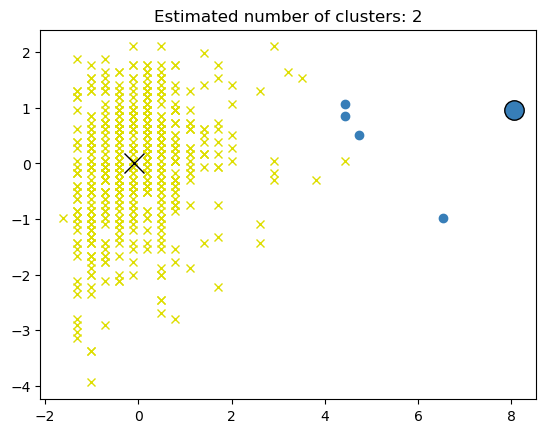

In [19]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [20]:
#proporcionar una medida de la cohesión y separación entre clusters. Un valor de silueta cercano a 1 indica clusters bien definidos. 
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3557410707472625
